In [1]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics.cluster import normalized_mutual_info_score, silhouette_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data1 = np.loadtxt('noCluster2_1K.csv', skiprows=1, delimiter=',')
data2 = np.loadtxt('noCluster2_2K.csv', skiprows=1, delimiter=',')
data3 = np.loadtxt('noCluster3_1K.csv', skiprows=1, delimiter=',')

In [3]:
X1 = data1[:, :2]
X2 = data2[:, :2]
X3 = data3[:, :2]

In [4]:
Y1 = data1[:,2]
Y2 = data2[:,2]
Y3 = data3[:,2]

In [5]:
dbscan = DBSCAN(eps=0.9, min_samples=50)
dbscan_labels = dbscan.fit_predict(X3)

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X1)

In [9]:
avglink = AgglomerativeClustering(n_clusters=2, linkage='average')
avglink_labels = avglink.fit_predict(X1)

In [10]:
normalized_mutual_info_score(dbscan_labels,Y3)

0.684153853412457

In [11]:
silhouette_score(X3, dbscan_labels)

0.4213683486458323

In [12]:
x1 = np.zeros((18,3))

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans_labels = kmeans.fit_predict(X1)
    x1[i-2][0] = normalized_mutual_info_score(kmeans_labels,Y1)
    x1[i-2][1] = silhouette_score(X1, kmeans_labels)
    x1[i-2][2] = i

In [13]:
x2 = np.zeros((18,3))

for i in range(2,20):
    avglink = AgglomerativeClustering(n_clusters=i, linkage='average')
    avglink_labels = avglink.fit_predict(X1)
    x2[i-2][0] = normalized_mutual_info_score(avglink_labels,Y1)
    x2[i-2][1] = silhouette_score(X1, avglink_labels)
    x2[i-2][2] = i

In [14]:
x3 = np.zeros((18,4))

for i in range(2,20):
    dbscan = DBSCAN(eps=(i*0.25), min_samples=(i*2))
    dbscan_labels = dbscan.fit_predict(X1)
    x3[i-2][0] = normalized_mutual_info_score(dbscan_labels,Y1)
    x3[i-2][1] = silhouette_score(X1, dbscan_labels)
    x3[i-2][2] = (i*0.25)
    x3[i-2][3] = (i*2)

In [15]:
x4 = np.zeros((18,3))

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans_labels = kmeans.fit_predict(X2)
    x4[i-2][0] = normalized_mutual_info_score(kmeans_labels,Y2)
    x4[i-2][1] = silhouette_score(X2, kmeans_labels)
    x4[i-2][2] = i

In [16]:
x5 = np.zeros((18,3))

for i in range(2,20):
    avglink = AgglomerativeClustering(n_clusters=i, linkage='average')
    avglink_labels = avglink.fit_predict(X2)
    x5[i-2][0] = normalized_mutual_info_score(avglink_labels,Y2)
    x5[i-2][1] = silhouette_score(X2, avglink_labels)
    x5[i-2][2] = i

In [17]:
x6 = np.zeros((18,4))

for i in range(2,20):
    dbscan = DBSCAN(eps=(i*0.01), min_samples=(i*2))
    dbscan_labels = dbscan.fit_predict(X2)
    x6[i-2][0] = normalized_mutual_info_score(dbscan_labels,Y2)
    x6[i-2][1] = silhouette_score(X2, dbscan_labels)
    x6[i-2][2] = (i*0.1)
    x6[i-2][3] = (i*2)

In [18]:
x7 = np.zeros((18,3))

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans_labels = kmeans.fit_predict(X3)
    x7[i-2][0] = normalized_mutual_info_score(kmeans_labels,Y3)
    x7[i-2][1] = silhouette_score(X3, kmeans_labels)
    x7[i-2][2] = i

In [19]:
x8 = np.zeros((18,3))

for i in range(2,20):
    avglink = AgglomerativeClustering(n_clusters=i, linkage='average')
    avglink_labels = avglink.fit_predict(X3)
    x8[i-2][0] = normalized_mutual_info_score(avglink_labels,Y3)
    x8[i-2][1] = silhouette_score(X3, avglink_labels)
    x8[i-2][2] = i

In [20]:
x9 = np.zeros((18,4))

for i in range(2,20):
    dbscan = DBSCAN(eps=(i*0.1), min_samples=(i*4))
    dbscan_labels = dbscan.fit_predict(X3)
    x9[i-2][0] = normalized_mutual_info_score(dbscan_labels,Y3)
    x9[i-2][1] = silhouette_score(X3, dbscan_labels)
    x9[i-2][2] = (i*0.1)
    x9[i-2][3] = (i*4)

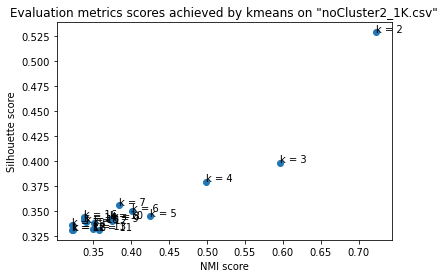

In [21]:
plt.scatter(x1[:,0], x1[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by kmeans on "noCluster2_1K.csv"')
for i in range(0,18):
    plt.annotate("k = " + str(int(x1[i][2])), ((x1[i][0]), (x1[i][1])))
plt.show()

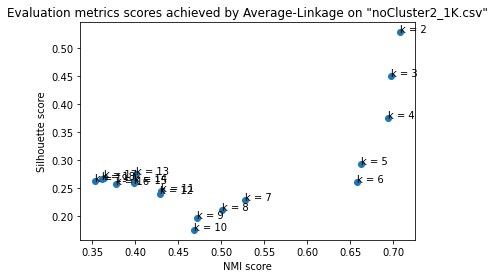

In [22]:
plt.scatter(x2[:,0], x2[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by Average-Linkage on "noCluster2_1K.csv"')
for i in range(0,18):
    plt.annotate("k = " + str(int(x2[i][2])), ((x2[i][0]), (x2[i][1])))
plt.show()

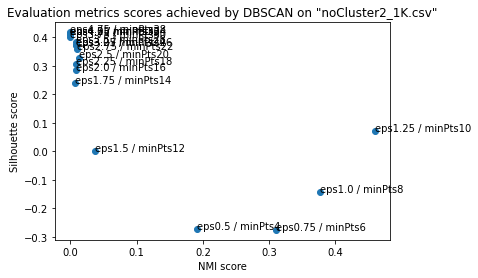

In [23]:
plt.scatter(x3[:,0], x3[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by DBSCAN on "noCluster2_1K.csv"')
for i in range(0,18):
    plt.annotate("eps" + str(x3[i][2])+" / minPts"+str(int(x3[i][3])), ((x3[i][0]), (x3[i][1])))
plt.show()

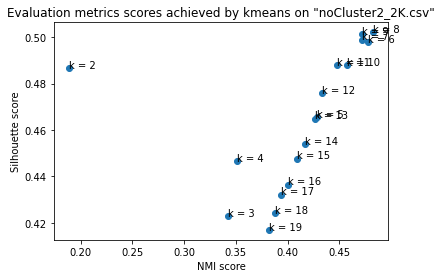

In [24]:
plt.scatter(x4[:,0], x4[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by kmeans on "noCluster2_2K.csv"')
for i in range(0,18):
    plt.annotate("k = " + str(int(x4[i][2])), ((x4[i][0]), (x4[i][1])))
plt.show()

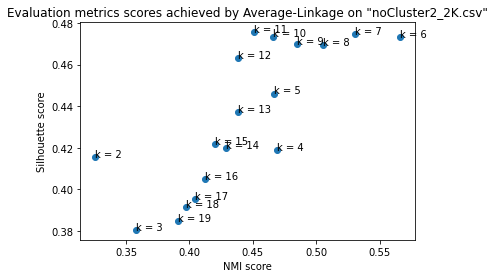

In [25]:
plt.scatter(x5[:,0], x5[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by Average-Linkage on "noCluster2_2K.csv"')
for i in range(0,18):
    plt.annotate("k = " + str(int(x5[i][2])), ((x5[i][0]), (x5[i][1])))
plt.show()

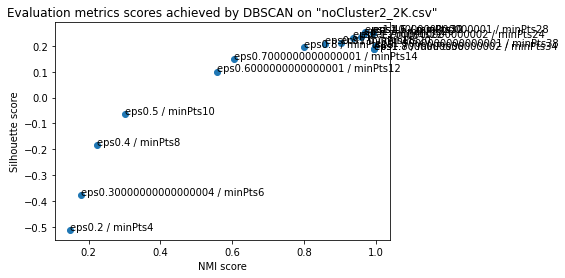

In [26]:
plt.scatter(x6[:,0], x6[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by DBSCAN on "noCluster2_2K.csv"')
for i in range(0,18):
    plt.annotate("eps" + str(x6[i][2])+" / minPts"+str(int(x6[i][3])), ((x6[i][0]), (x6[i][1])))
plt.show()

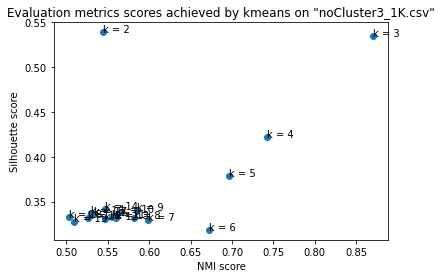

In [27]:
plt.scatter(x7[:,0], x7[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by kmeans on "noCluster3_1K.csv"')
for i in range(0,18):
    plt.annotate("k = " + str(int(x7[i][2])), ((x7[i][0]), (x7[i][1])))
plt.show()

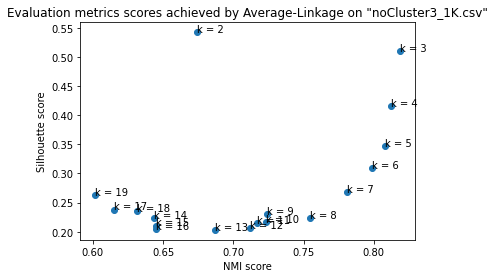

In [28]:
plt.scatter(x8[:,0], x8[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by Average-Linkage on "noCluster3_1K.csv"')
for i in range(0,18):
    plt.annotate("k = " + str(int(x8[i][2])), ((x8[i][0]), (x8[i][1])))
plt.show()

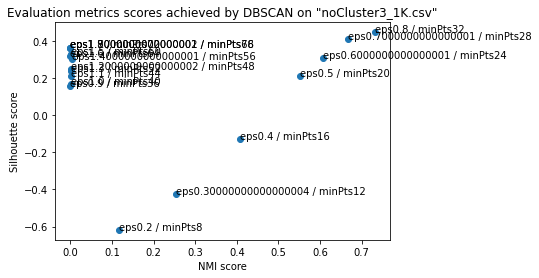

In [29]:
plt.scatter(x9[:,0], x9[:,1])
plt.xlabel("NMI score")
plt.ylabel("Silhouette score")
plt.title('Evaluation metrics scores achieved by DBSCAN on "noCluster3_1K.csv"')
for i in range(0,18):
    plt.annotate("eps" + str(x9[i][2])+" / minPts"+str(int(x9[i][3])), ((x9[i][0]), (x9[i][1])))
plt.show()

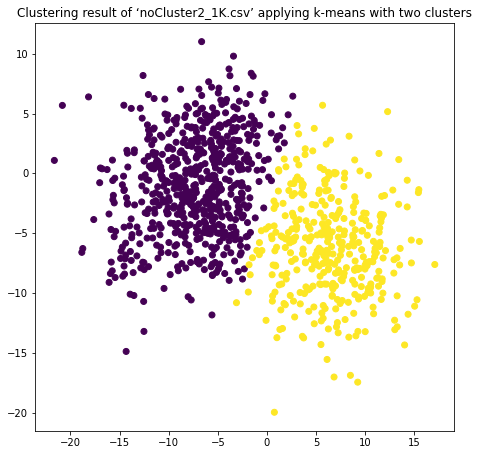

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X1)
plt.scatter(X1[:,0], X1[:,1], c=kmeans_labels)
plt.title('Clustering result of ‘noCluster2_1K.csv’ applying k-means with two clusters')
fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)

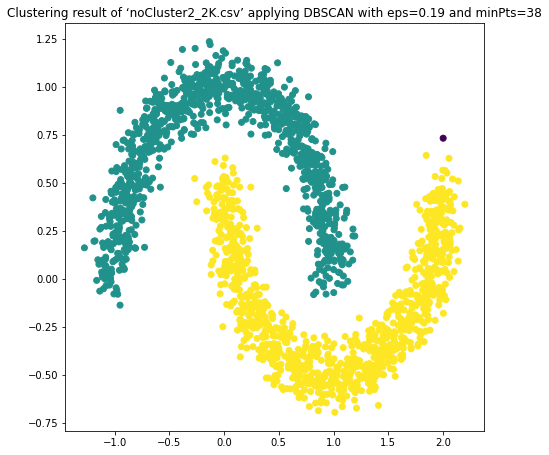

In [31]:
dbscan = DBSCAN(eps=(0.19), min_samples=(38))
dbscan_labels = dbscan.fit_predict(X2)
plt.scatter(X2[:,0], X2[:,1], c=dbscan_labels)
plt.title('Clustering result of ‘noCluster2_2K.csv’ applying DBSCAN with eps=0.19 and minPts=38')
fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)

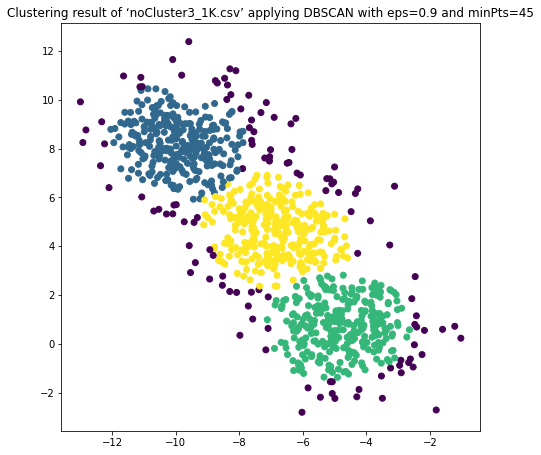

In [32]:
dbscan = DBSCAN(eps=0.9, min_samples=45)
dbscan_labels = dbscan.fit_predict(X3)
plt.scatter(X3[:,0], X3[:,1], c=dbscan_labels)
plt.title('Clustering result of ‘noCluster3_1K.csv’ applying DBSCAN with eps=0.9 and minPts=45')
fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)

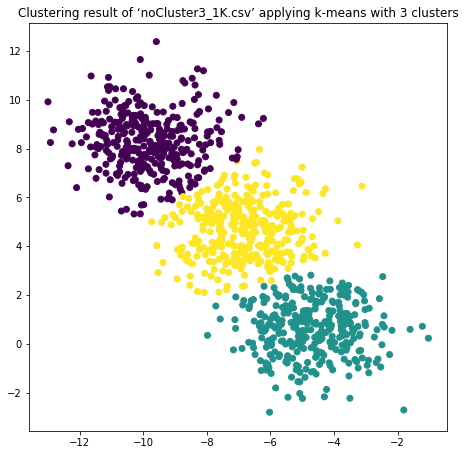

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X3)
plt.scatter(X3[:,0], X3[:,1], c=kmeans_labels)
plt.title('Clustering result of ‘noCluster3_1K.csv’ applying k-means with 3 clusters')
fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)

Text(0.5, 1.0, 'Plotted data "noCluster2_1K.csv"')

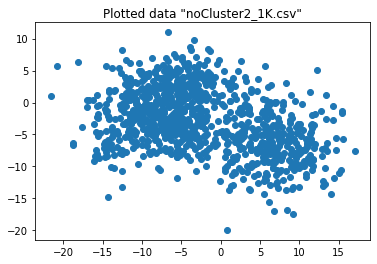

In [34]:
plt.scatter(X1[:,0], X1[:,1])
plt.title('Plotted data "noCluster2_1K.csv"')

Text(0.5, 1.0, 'Plotted data "noCluster2_2K.csv"')

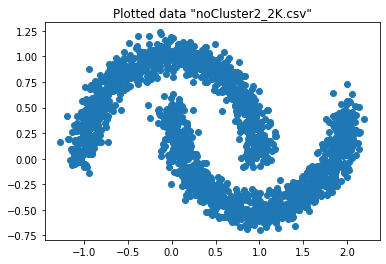

In [35]:
plt.scatter(X2[:,0], X2[:,1])
plt.title('Plotted data "noCluster2_2K.csv"')

Text(0.5, 1.0, 'Plotted data "noCluster3_1K.csv"')

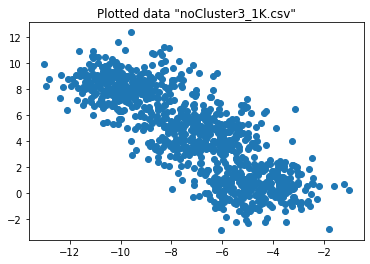

In [36]:
plt.scatter(X3[:,0], X3[:,1])
plt.title('Plotted data "noCluster3_1K.csv"')